# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/Pokemon.csv")

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### 1. How many Legendary Pokemon are there? ( 1pt )

In [4]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [5]:
df.shape

(721, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [7]:
df[df['isLegendary'] == True].count()

Number              46
Name                46
Type_1              46
Type_2              27
Total               46
HP                  46
Attack              46
Defense             46
Sp_Atk              46
Sp_Def              46
Speed               46
Generation          46
isLegendary         46
Color               46
hasGender           46
Pr_Male              6
Egg_Group_1         46
Egg_Group_2          0
hasMegaEvolution    46
Height_m            46
Weight_kg           46
Catch_Rate          46
Body_Style          46
dtype: int64

There are 46 legendary Pokemons in this given dataset.

### 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

In [8]:
df['Atk-to-HP Ratio'] = df['Attack']/df['HP']
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Atk-to-HP Ratio
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,1.088889
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,1.033333
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,1.025000
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,1.333333
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,1.103448


In [9]:
df.iloc[df['Atk-to-HP Ratio'].idxmax()]

Number                    292
Name                 Shedinja
Type_1                    Bug
Type_2                  Ghost
Total                     236
HP                          1
Attack                     90
Defense                    45
Sp_Atk                     30
Sp_Def                     30
Speed                      40
Generation                  3
isLegendary             False
Color                   Brown
hasGender               False
Pr_Male                   NaN
Egg_Group_1           Mineral
Egg_Group_2               NaN
hasMegaEvolution        False
Height_m                 0.79
Weight_kg                 1.2
Catch_Rate                 45
Body_Style          head_base
Atk-to-HP Ratio          90.0
Name: 291, dtype: object

The Pokemon with the highest attack-to-HP ratio is Shedinja with a ratio of 90

In [10]:
df.loc[df['Name'] == 'Shedinja']

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Atk-to-HP Ratio
291,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,...,False,NaN,Mineral,NaN,False,0.79,1.2,45,head_base,90.0


### 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

Before building a binary classifier, I first converted the 'color' and 'body-style' feature to numerical variables and analyzed 
using plots whether a certain variable would make a good model or not.

In [11]:
df['Color'].value_counts()

Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [12]:
df['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [13]:
df2 = df[['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 
          'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Color', 'Body_Style']]
df2.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,Color,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0.71,6.9,45,Green,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0.99,13.0,45,Green,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,2.01,100.0,45,Green,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,0.61,8.5,45,Red,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1.09,19.0,45,Red,bipedal_tailed


In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df2["Color Code"] = ord_enc.fit_transform(df2[["Color"]])
df2.head()

D:\Anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,Color,Body_Style,Color Code
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0.71,6.9,45,Green,quadruped,3.0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0.99,13.0,45,Green,quadruped,3.0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,2.01,100.0,45,Green,quadruped,3.0
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,0.61,8.5,45,Red,bipedal_tailed,7.0
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1.09,19.0,45,Red,bipedal_tailed,7.0


In [15]:
ord_enc = OrdinalEncoder()
df2["Body Code"] = ord_enc.fit_transform(df2[["Body_Style"]])
df2.head()

D:\Anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,Color,Body_Style,Color Code,Body Code
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0.71,6.9,45,Green,quadruped,3.0,9.0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0.99,13.0,45,Green,quadruped,3.0,9.0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,2.01,100.0,45,Green,quadruped,3.0,9.0
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,0.61,8.5,45,Red,bipedal_tailed,7.0,0.0
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1.09,19.0,45,Red,bipedal_tailed,7.0,0.0


In [16]:
df2['isFireType'] = (df2['Type_1'] == 'Fire') | (df2['Type_2'] == 'Fire')
df2.head()

D:\Anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,Color,Body_Style,Color Code,Body Code,isFireType
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0.71,6.9,45,Green,quadruped,3.0,9.0,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0.99,13.0,45,Green,quadruped,3.0,9.0,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,2.01,100.0,45,Green,quadruped,3.0,9.0,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,0.61,8.5,45,Red,bipedal_tailed,7.0,0.0,True
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1.09,19.0,45,Red,bipedal_tailed,7.0,0.0,True


D:\Anaconda3\envs\project-env\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

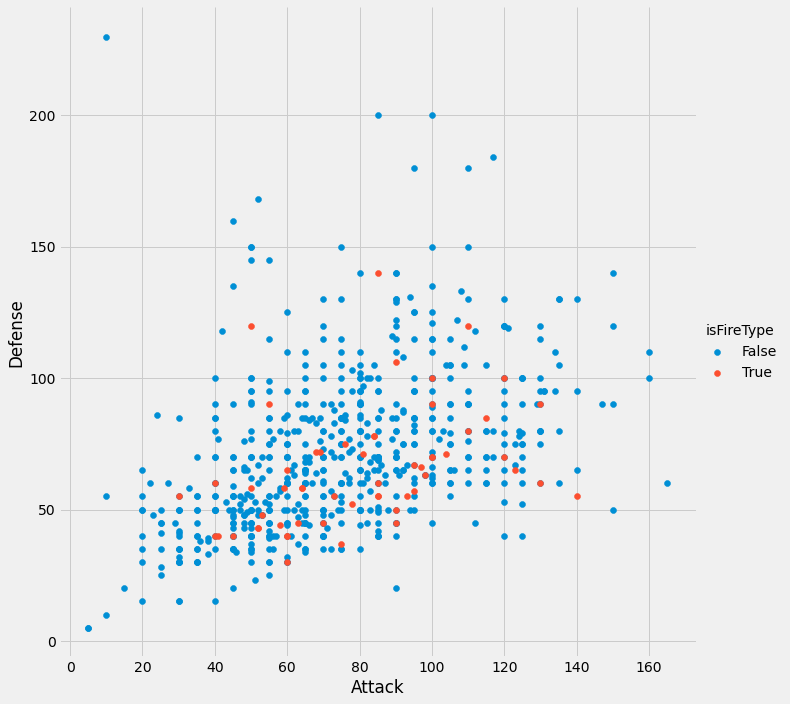

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df2, hue="isFireType", size = 10).map(plt.scatter, "Attack", "Defense").add_legend()

D:\Anaconda3\envs\project-env\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

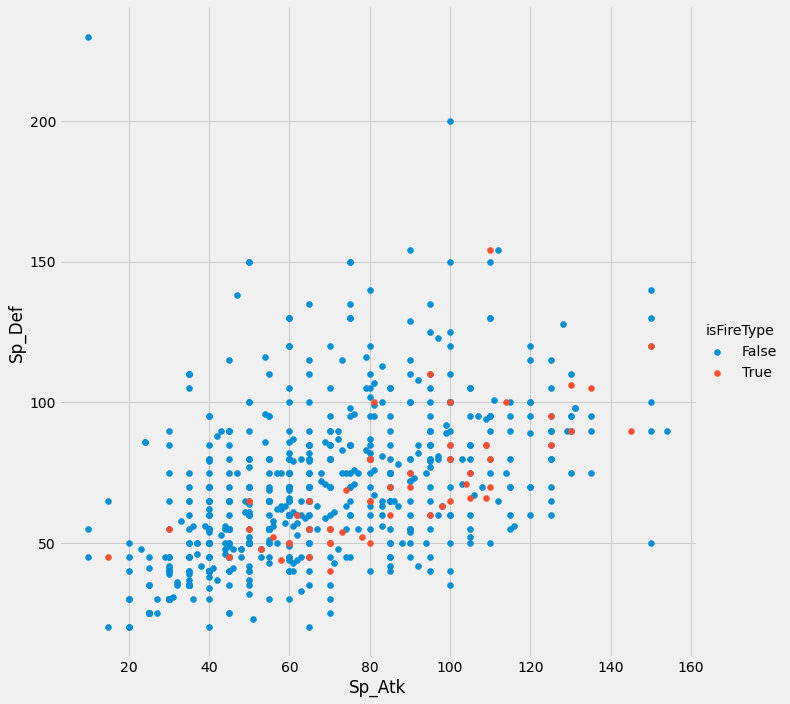

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df2, hue="isFireType", size = 10).map(plt.scatter, "Sp_Atk", "Sp_Def").add_legend()

<AxesSubplot:xlabel='isFireType', ylabel='Attack'>

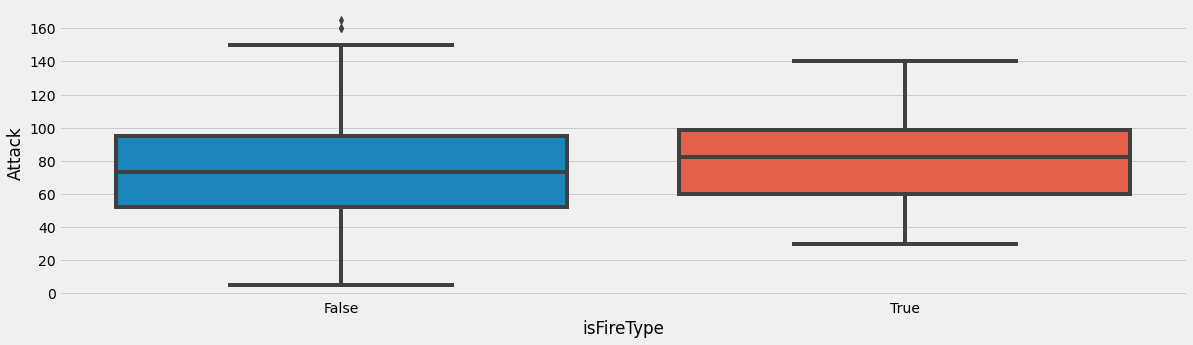

In [19]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Attack", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Defense'>

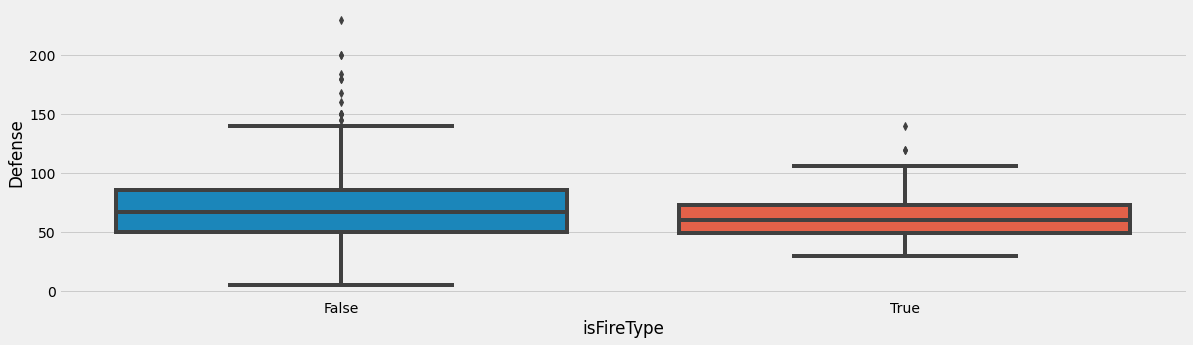

In [20]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Defense", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Color Code'>

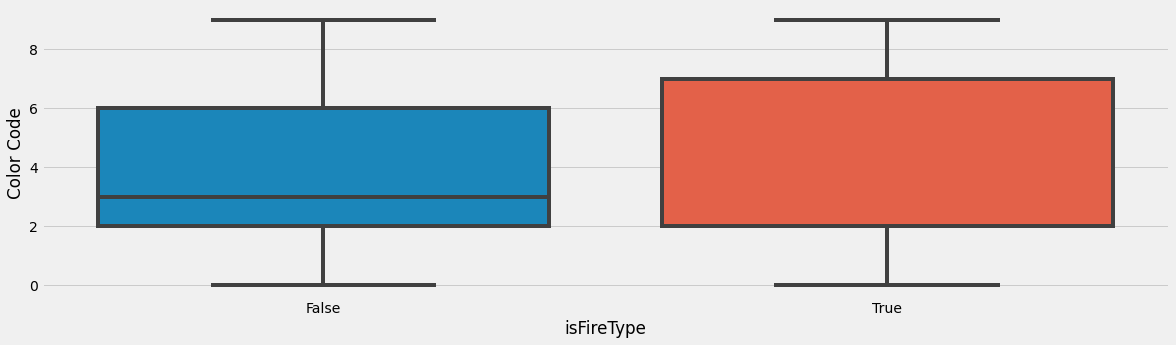

In [21]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Color Code", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Catch_Rate'>

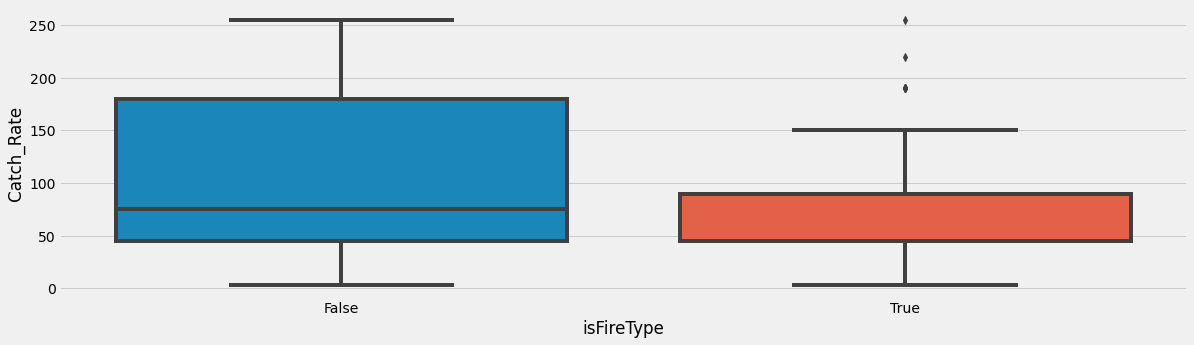

In [22]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Catch_Rate", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Height_m'>

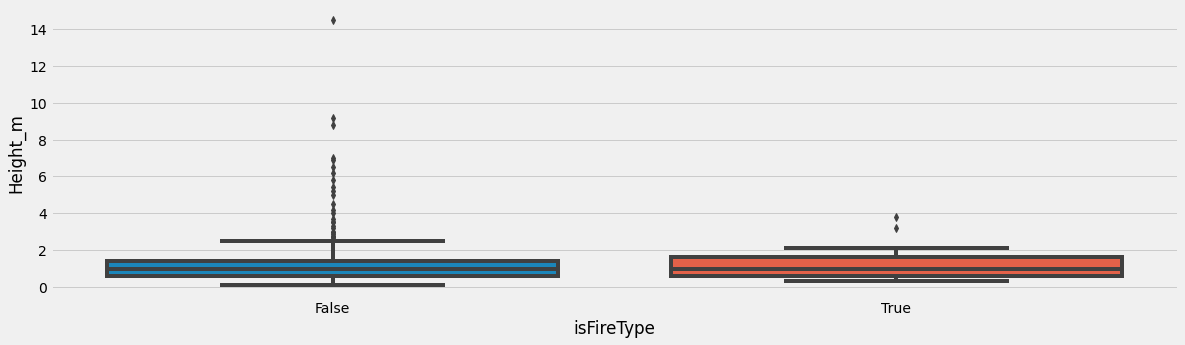

In [23]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Height_m", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Weight_kg'>

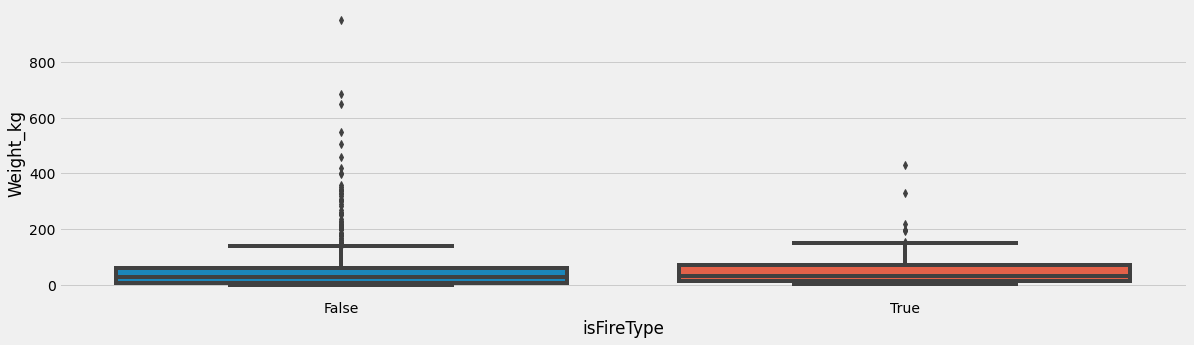

In [24]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Weight_kg", data=df2)

<AxesSubplot:xlabel='isFireType', ylabel='Body Code'>

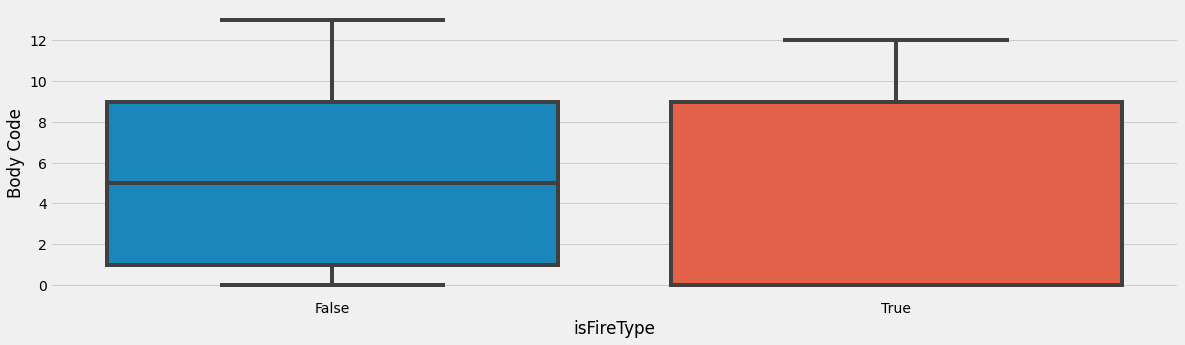

In [25]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="isFireType", y="Body Code", data=df2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df2["isFireType"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df2["isFireType"])
print(accuracy)

0.7198335644937587


<AxesSubplot:>

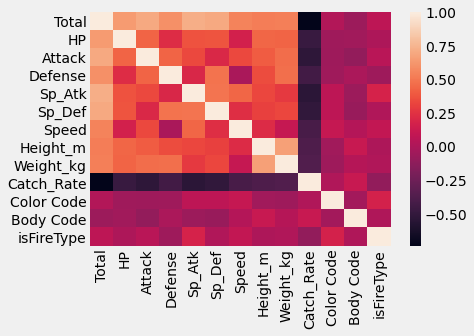

In [27]:
import seaborn as sns

sns.heatmap(df2.corr())

In [28]:
logistic_model.coef_

array([[ 0.00059143, -0.01624887,  0.01437227, -0.02295688,  0.03750808,
        -0.01146329, -0.00061987]])

In [29]:
df2[df2['isFireType'] == True].shape

(56, 18)

---
### Without Upsampling

### 70-30

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [56]:
no_up_score1 = metrics.accuracy_score(Y_test, pred_test)
no_up_precision1 = metrics.precision_score(Y_test, pred_test)
no_up_recall1 = metrics.recall_score(Y_test, pred_test)

print("Accuracy:", no_up_score1)
print("Precision:", no_up_precision1)
print("Recall:", no_up_recall1)

Accuracy: 0.7649769585253456
Precision: 0.16071428571428573
Recall: 0.6923076923076923


---
### 75-25

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.25,  
                   train_size=0.75,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [59]:
no_up_score2 = metrics.accuracy_score(Y_test, pred_test)
no_up_precision2 = metrics.precision_score(Y_test, pred_test)
no_up_recall2 = metrics.recall_score(Y_test, pred_test)

print("Accuracy:", no_up_score2)
print("Precision:", no_up_precision2)
print("Recall:", no_up_recall2)

Accuracy: 0.7348066298342542
Precision: 0.1509433962264151
Recall: 0.7272727272727273


---
### 80-20

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.2,  
                   train_size=0.8,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [61]:
no_up_score3 = metrics.accuracy_score(Y_test, pred_test)
no_up_precision3 = metrics.precision_score(Y_test, pred_test)
no_up_recall3 = metrics.recall_score(Y_test, pred_test)

print("Accuracy:", no_up_score3)
print("Precision:", no_up_precision3)
print("Recall:", no_up_recall3)

Accuracy: 0.7310344827586207
Precision: 0.16279069767441862
Recall: 0.7


---
### With Upsampling

### 70-30

In [36]:
X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_firetype = X[X.isFireType==False]
is_firetype = X[X.isFireType==True]

# upsample minority
firetype_upsampled = resample(is_firetype,
                          replace=True, # sample with replacement
                          n_samples=len(not_firetype), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
firetype_upsampled = pd.concat([not_firetype, firetype_upsampled])

# check new class counts
firetype_upsampled.isFireType.value_counts()

False    461
True     461
Name: isFireType, dtype: int64

In [37]:
Y_train = firetype_upsampled.isFireType
X_train = firetype_upsampled.drop('isFireType', axis=1)

firetype_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = firetype_upsampled.predict(X_test)

In [38]:
score1 = metrics.accuracy_score(Y_test, upsampled_pred)
precision1 = metrics.precision_score(Y_test, upsampled_pred)
recall1 = metrics.recall_score(Y_test, upsampled_pred)


print("Accuracy:", score1)
print("Precision:", precision1)
print("Recall:", recall1)

Accuracy: 0.7557603686635944
Precision: 0.15517241379310345
Recall: 0.6923076923076923


---
### 75-25

In [39]:
X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.25,  
                   train_size=0.75,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_firetype = X[X.isFireType==False]
is_firetype = X[X.isFireType==True]

# upsample minority
firetype_upsampled = resample(is_firetype,
                          replace=True, # sample with replacement
                          n_samples=len(not_firetype), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
firetype_upsampled = pd.concat([not_firetype, firetype_upsampled])

# check new class counts
firetype_upsampled.isFireType.value_counts()

False    495
True     495
Name: isFireType, dtype: int64

In [40]:
Y_train = firetype_upsampled.isFireType
X_train = firetype_upsampled.drop('isFireType', axis=1)

firetype_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = firetype_upsampled.predict(X_test)

In [41]:
score2 = metrics.accuracy_score(Y_test, upsampled_pred)
precision2 = metrics.precision_score(Y_test, upsampled_pred)
recall2 = metrics.recall_score(Y_test, upsampled_pred)


print("Accuracy:", score2)
print("Precision:", precision2)
print("Recall:", recall2)

Accuracy: 0.7237569060773481
Precision: 0.14545454545454545
Recall: 0.7272727272727273


---
### 80-20

In [42]:
X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.2,  
                   train_size=0.8,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_firetype = X[X.isFireType==False]
is_firetype = X[X.isFireType==True]

# upsample minority
firetype_upsampled = resample(is_firetype,
                          replace=True, # sample with replacement
                          n_samples=len(not_firetype), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
firetype_upsampled = pd.concat([not_firetype, firetype_upsampled])

# check new class counts
firetype_upsampled.isFireType.value_counts()

False    530
True     530
Name: isFireType, dtype: int64

In [43]:
Y_train = firetype_upsampled.isFireType
X_train = firetype_upsampled.drop('isFireType', axis=1)

firetype_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = firetype_upsampled.predict(X_test)

In [44]:
score3 = metrics.accuracy_score(Y_test, upsampled_pred)
precision3 = metrics.precision_score(Y_test, upsampled_pred)
recall3 = metrics.recall_score(Y_test, upsampled_pred)


print("Accuracy:", score3)
print("Precision:", precision3)
print("Recall:", recall3)

Accuracy: 0.7034482758620689
Precision: 0.13333333333333333
Recall: 0.6


### 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

In [45]:
df_legendary = df[df['isLegendary'] == True]
df_legendary.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Atk-to-HP Ratio
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,False,NaN,Undiscovered,NaN,False,1.70,55.4,3,two_wings,0.944444
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,...,False,NaN,Undiscovered,NaN,False,1.60,52.6,3,two_wings,1.000000
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,...,False,NaN,Undiscovered,NaN,False,2.01,60.0,3,two_wings,1.111111
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,...,False,NaN,Undiscovered,NaN,True,2.01,122.0,3,bipedal_tailed,1.037736
242,243,Raikou,Electric,NaN,580,90,85,75,115,100,...,False,NaN,Undiscovered,NaN,False,1.91,178.0,3,quadruped,0.944444


<AxesSubplot:>

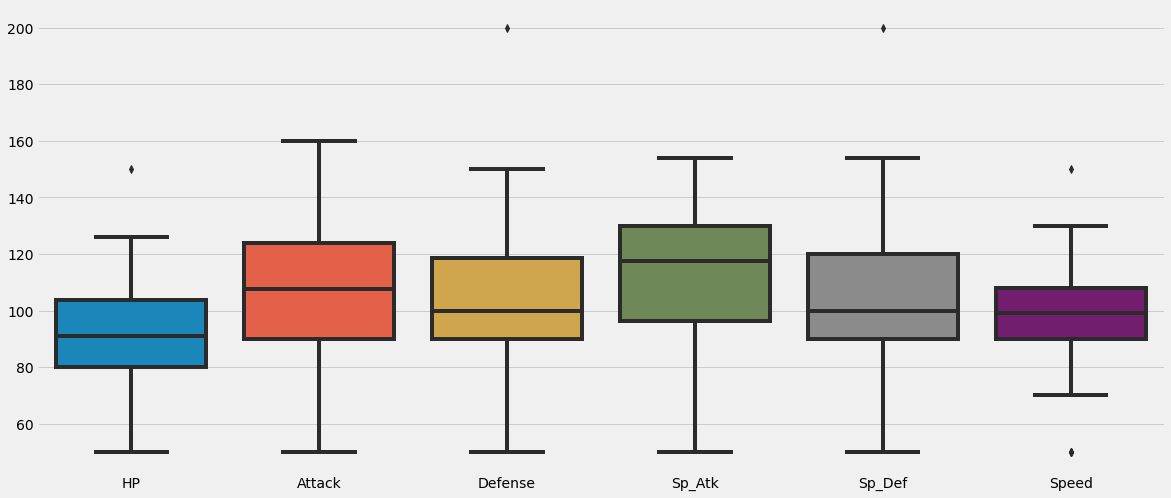

In [46]:
plt.figure(figsize=(18,8))

df_legendary_plot = df_legendary[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
sns.boxplot(data = df_legendary_plot)

From the plot, it can be observed that all features (excluding the 'Total' feature) for legendary Pokemons have an average value of about 100. Hence, it can be inferred that a legendary Pokemon can have an expected HP, Attack, Defense, etc of about 100.

### 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df2[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df2["isFireType"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
predictions = logistic_model.predict(X)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [51]:
df2["Predicted isFireType"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]
df2["Probability"] = prob

D:\Anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\envs\project-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df2[['Name', 'Type_1', 'Type_2', 'isFireType', 'Predicted isFireType', 'Probability']].head(10)

,Name,Type_1,Type_2,isFireType,Predicted isFireType,Probability
0,Bulbasaur,Grass,Poison,False,False,0.062659
1,Ivysaur,Grass,Poison,False,False,0.076567
2,Venusaur,Grass,Poison,False,False,0.099228
3,Charmander,Fire,NaN,True,False,0.064169
4,Charmeleon,Fire,NaN,True,False,0.092299
5,Charizard,Fire,Flying,True,False,0.152978
6,Squirtle,Water,NaN,False,False,0.035687
7,Wartortle,Water,NaN,False,False,0.043109
8,Blastoise,Water,NaN,False,False,0.052258
9,Caterpie,Bug,NaN,False,False,0.033490


### 6. What is the accuracy of your model?( 2pts )

In [53]:
print((f'From the previous number, by resampling the dataset, '
       f'the best accuracy established by the model was {score1*100}%'))

From the previous number, by resampling the dataset, the best accuracy established by the model was 75.57603686635944%


### 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )

From number 3:

### Without Upsampling

In [64]:
#Create new dataframe for comparison
data1 = [['70-30', no_up_score1, no_up_precision1, no_up_recall1],
         ['75-25', no_up_score2, no_up_precision2, no_up_recall2], 
         ['80-20', no_up_score3, no_up_precision3, no_up_recall3]]
score_df1 = pd.DataFrame(data1, columns = ['Data Splitting', 'Accuracy Score', 'Precision Score', 'Recall Score'])
score_df1

,Data Splitting,Accuracy Score,Precision Score,Recall Score
0,70-30,0.764977,0.160714,0.692308
1,75-25,0.734807,0.150943,0.727273
2,80-20,0.731034,0.162791,0.700000


### With Upsampling

In [65]:
#Create new dataframe for comparison
data2 = [['70-30', score1, precision1, recall1], ['75-25', score2, precision2, recall2], ['80-20', score3, precision3, recall3]]
score_df2 = pd.DataFrame(data2, columns = ['Data Splitting', 'Accuracy Score', 'Precision Score', 'Recall Score'])
score_df2

,Data Splitting,Accuracy Score,Precision Score,Recall Score
0,70-30,0.755760,0.155172,0.692308
1,75-25,0.723757,0.145455,0.727273
2,80-20,0.703448,0.133333,0.600000
